# Planetary Stability

The dataset consists of 1500 artifically generated 3-planet systems.  All planets have a mass of $5M_\oplus$, which I think is roughly where the Kepler sample should peak.  They were all integrated for 1 million orbits of the inner planet (initialized at 0.05 AU), and the stable column shows whether the system survives or not.  The next two planets were initialized somewhere between 0-10 Hill radii away.  Each run records the initial orbital parameters of each of the 3 planets.  Below is a description of each column, and see below for a figure showing each angle:

* Sim_ID: Unique Identifier
* Stable: Whether system was stable after 1e6 inner orbits
* Norbits_instability: Number of inner-planet orbital periods until instability.
* Norbits: 1e6 for all
* Mplanet: Mass of all planets (in solar masses)
* RH/a: The Hill radius, scaled by the semimajor axis.  This just depeneds on the planet/star mass ratio so is the same for all.

For each planet (numbered 1,2,3--all angles in radians), we record the initial

* a: semimajor axis (AU)
* e: eccentricity
* pomega: longitude of pericenter (what direction an eccentric orbit is oriented, this is Omega + omega in figure below, useful for low inclination orbits)
* inc: inclination
* Omega: longitude of the node (how the orbital plane is oriented)
* f: true anomaly: how far the planet started from pericenter.
* xyz: cartesian positions (in AU)
* vxvyvz: cartesian velocities (in AU/yr)

There are then two final columns I added as checks:

* Rel_Eerr: Relative energy error during the integration
* integ_time: Time it took to run simulation (in sec)

These two columns **SHOULD NOT** be used in the analysis.  Like before when I had final eccentricities, they have information about the outcome (runs with worse energy conservation likely had closer encounters, and the ones with shorter integration times are the ones that went unstable).  

See below for an image showing the angles.

All planets were simply started with e distributed uniformly between 0 and 0.02, and the inclination between 0 and 0.01 radians.  

![orbits](images/orbit.png)

I made two data sets (one with ~1000 and one with ~500).  The combined dataset is called data/1e6data.csv:

In [4]:
import pandas as pd
df = pd.read_csv('../data/1e6dataset.csv', index_col=0)
df.tail()

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,Omega3,f3,x3,y3,z3,vx3,vy3,vz3,Rel_Eerr,integ_time
Sim_ID,,,,,,,,,,,,,,,,,,,,,
1995,True,1000000.000000,1000000.0,0.000015,0.021544,0.05,0.01118,0.009089,-1.079974,0.010988,...,2.967275,-0.849203,-0.067186,0.010875,0.000015,-3.710960,-23.860270,0.396331,1.221454e-13,920.464203
1996,False,393070.901091,1000000.0,0.000015,0.021544,0.05,0.01118,0.011170,4.751147,0.009788,...,2.553637,1.060472,0.006214,-0.066580,0.000532,24.201111,2.232317,-0.156514,3.073272e-14,415.862748
1997,True,1000000.000000,1000000.0,0.000015,0.021544,0.05,0.01118,0.004709,1.389463,0.011670,...,0.639780,-0.803942,0.056566,-0.039027,-0.000454,13.578741,19.784498,0.054182,1.261405e-14,884.219790
1998,True,1000000.000000,1000000.0,0.000015,0.021544,0.05,0.01118,0.002514,-1.615616,0.001747,...,0.170469,-2.806279,0.001103,-0.067801,-0.000308,24.000226,0.476752,-0.016553,3.729223e-14,1005.072442
1999,False,35087.808064,1000000.0,0.000015,0.021544,0.05,0.01118,0.002846,-2.724788,0.016104,...,1.764170,-1.827689,-0.029586,0.055161,0.000047,-22.018055,-12.027872,0.061370,4.347926e-15,33.730164


I tried to engineer things so about half of the systems were stable and half unstable.  This should help the analysis:

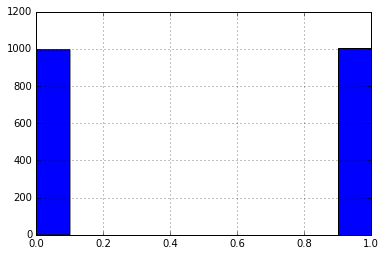

In [5]:
%matplotlib inline
df['Stable'].hist()

One thing we know is that the planets' separation in Hill radii should matter strongly.  Most previous worked has focused on this:

In [7]:
def HillSep(system):
    return (system['a2']-system['a1'])/(system['a1']*system['RH/a'])

In [8]:
df['HillSep'] = df.apply(HillSep, axis=1)
df.head()

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,f3,x3,y3,z3,vx3,vy3,vz3,Rel_Eerr,integ_time,HillSep
Sim_ID,,,,,,,,,,,,,,,,,,,,,
0,True,1000000.000000,1000000.0,0.000015,0.021544,0.05,0.01118,0.015159,-3.640656,0.004519,...,1.573978,-0.068236,-0.014064,-4.729121e-04,4.567729,-23.360975,0.267600,2.398596e-15,1006.014277,8.377687
1,False,210649.647778,1000000.0,0.000015,0.021544,0.05,0.01118,0.016949,4.798937,0.004452,...,-1.749616,-0.062409,0.006367,5.514355e-07,-2.331204,-24.959053,0.000893,5.615807e-14,216.212583,5.537457
2,True,1000000.000000,1000000.0,0.000015,0.021544,0.05,0.01118,0.018957,0.355323,0.001481,...,-0.032550,-0.062995,0.031855,-4.634034e-04,-10.685821,-21.138176,-0.047841,7.017671e-14,983.189257,8.824137
3,False,19982.209941,1000000.0,0.000015,0.021544,0.05,0.01118,0.010885,-3.958688,0.010540,...,0.946351,0.063081,-0.005132,4.295278e-04,2.220935,24.945650,-0.118977,7.016550e-15,20.751416,5.951859
4,False,46995.390321,1000000.0,0.000015,0.021544,0.05,0.01118,0.002063,2.488507,0.002705,...,-0.455684,0.051185,0.037257,-7.717988e-05,-14.781240,20.203958,0.035016,1.052342e-14,49.353019,5.944192


In [12]:
stable = df['Stable'].values
K = df['HillSep'].values
t_inst = df['Norbits_instability']

Here is the time to instability vs separation in Hill radii.  There is a lot of scatter, though there appears to be some structure, presumably from mean motion resonances (near-integer ratios between orbital periods between planets).  Presumably this structure gets smeared somewhat by the fact that we are also varying the eccentricities from 0-0.02 (as well as randomizing all the other angles).

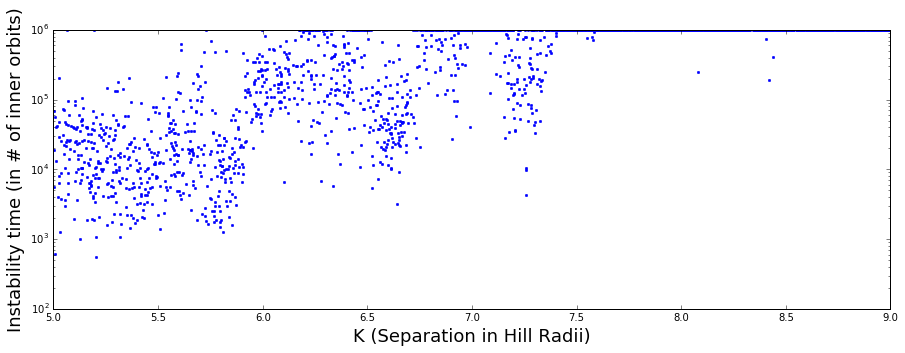

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(K, t_inst, '.', markersize=5)
ax.set_xlabel('K (Separation in Hill Radii)', fontsize=18)
ax.set_ylabel('Instability time (in # of inner orbits)', fontsize=18)
ax.set_yscale('log')

Compare with this plot by Alysa and Christa for Earth-mass planets.  In their case I believe all eccentricities are initially 0, and they did longer integrations.

![instability](images/log_t_vs_beta.png)

They've shown the dips are well correlated with resonances, so that might be a good feature to try and put in (P2/P1, P3/P2, P3/P1).  The most important resonances are of the form j+1/j (e.g. 9:8), then of the form j+2/j (e.g. 7:5) etc.

Here is a histogram of the separation in Hill radii between the closest two planets of the three:

Here's everything collapsed down into 'stable' vs 'unstable' over 1e6 years:

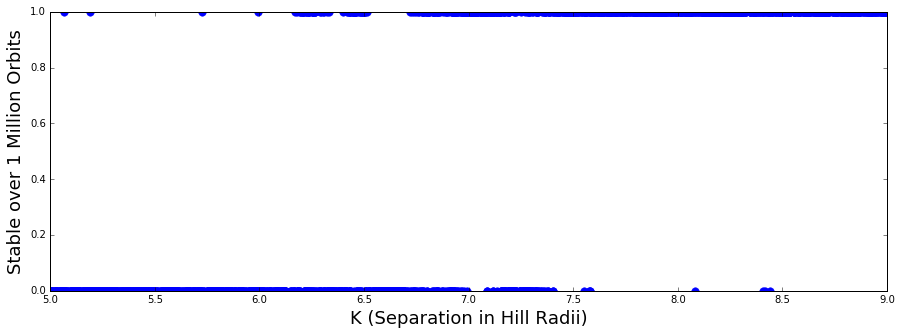

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(K, stable, '.', markersize=15)
ax.set_xlabel('K (Separation in Hill Radii)', fontsize=18)
ax.set_ylabel('Stable over 1 Million Orbits', fontsize=18)

I used a uniform distribution of Hill separations between 5-9:

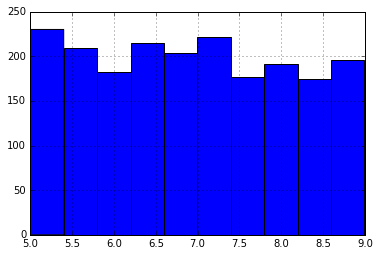

In [16]:
df['HillSep'].hist()